In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')

In [3]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)

In [5]:
m, n = data.shape
np.random.shuffle(data)

In [6]:
data_dev = data[0:1000].T
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

Y_dev = data_dev[0]

In [7]:
data_train = data[1000:m].T
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

Y_train = data_train[0]

In [8]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2

In [9]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [10]:
def ReLU_deriv(Z):
    return Z > 0

In [11]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [12]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    
    return Z1, A1, Z2, A2

In [13]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    
    return one_hot_Y

In [14]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    
    return dW1, db1, dW2, db2

In [15]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    
    return W1, b1, W2, b2

In [16]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [17]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [18]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [19]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[2 2 2 ... 4 2 4] [7 6 7 ... 1 7 1]
0.09488135593220338
Iteration:  10
[7 3 4 ... 4 3 4] [7 6 7 ... 1 7 1]
0.17835593220338983
Iteration:  20
[7 3 7 ... 4 3 4] [7 6 7 ... 1 7 1]
0.2700169491525424
Iteration:  30
[7 3 7 ... 3 3 3] [7 6 7 ... 1 7 1]
0.35515254237288135
Iteration:  40
[7 3 7 ... 1 2 1] [7 6 7 ... 1 7 1]
0.4055423728813559
Iteration:  50
[7 9 7 ... 1 2 1] [7 6 7 ... 1 7 1]
0.4383728813559322
Iteration:  60
[7 9 7 ... 1 2 1] [7 6 7 ... 1 7 1]
0.4687457627118644
Iteration:  70
[7 9 7 ... 1 2 1] [7 6 7 ... 1 7 1]
0.4946949152542373
Iteration:  80
[7 9 7 ... 1 2 1] [7 6 7 ... 1 7 1]
0.5171186440677966
Iteration:  90
[7 9 7 ... 1 7 1] [7 6 7 ... 1 7 1]
0.5396779661016949
Iteration:  100
[7 9 7 ... 1 7 1] [7 6 7 ... 1 7 1]
0.560677966101695
Iteration:  110
[7 9 7 ... 1 7 1] [7 6 7 ... 1 7 1]
0.5819661016949152
Iteration:  120
[7 9 7 ... 1 7 1] [7 6 7 ... 1 7 1]
0.6006440677966102
Iteration:  130
[7 9 7 ... 1 7 1] [7 6 7 ... 1 7 1]
0.6197118644067796
Iteration:  140

In [20]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    
    return predictions

In [21]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


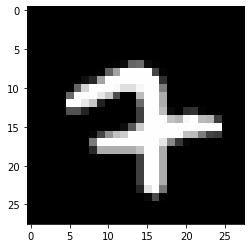

In [22]:
test_prediction(0, W1, b1, W2, b2)

Prediction:  [6]
Label:  6


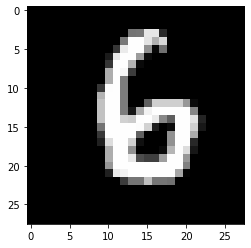

In [23]:
test_prediction(1, W1, b1, W2, b2)

Prediction:  [7]
Label:  7


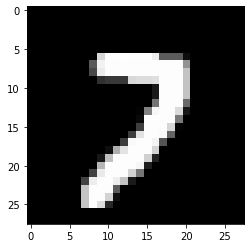

In [24]:
test_prediction(2, W1, b1, W2, b2)

Prediction:  [2]
Label:  2


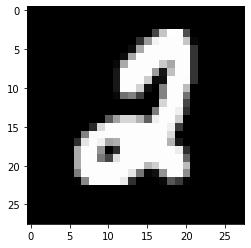

In [25]:
test_prediction(3, W1, b1, W2, b2)